Ch3 p17

The function in p11 is unknown, but that does not hinder our use of the table for interpolation. Interpolate with a cubic polynomial that passes through the first four points to get f(0.2). Estimate the error from the next-term rule. 

In [2]:
import numpy as np
from naf.incf import dd_tb, dd_poly
from tabulate import tabulate
import matplotlib.pyplot as plt

   x     f[x0]    f[x0,x1]    f[x0,x1,x2]    f[x0,x1,x2,x3]    [x0,x1,x2,x3,x4]
----  --------  ----------  -------------  ----------------  ------------------
 0.5  -1.1518     -2.64943       1.09548            1.02855          0.00361111
-0.2   0.7028     -2.43033       0.684056           1.02675          0
 0.7  -1.4845     -2.22512       0.889405           0                0
 0.1  -0.14943    -2.8477        0                  0                0
 0     0.13534     0             0                  0                0


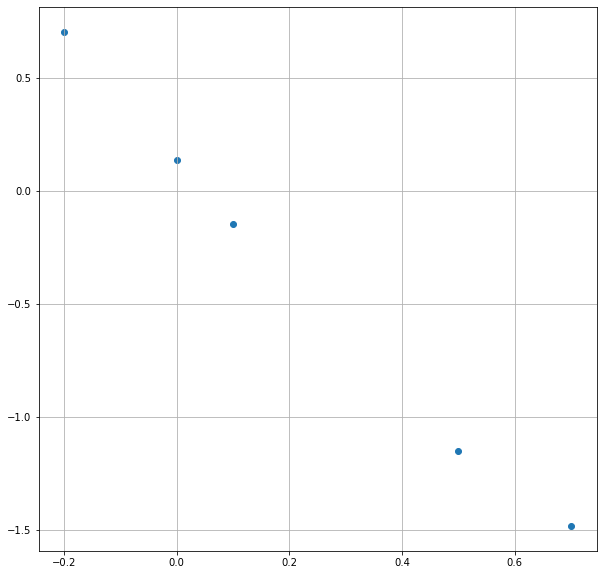

In [3]:
pts = np.array([[0.5, -1.1518],[-0.2,0.7028],[0.7,-1.4845],[0.1,-0.14943],[0.0,0.13534]])
xr = pts[...,0]
yr = pts[...,1]

f = dd_tb(pts)

tb_h = tb_h = ['x', 'f[x0]', 'f[x0,x1]', 'f[x0,x1,x2]', 'f[x0,x1,x2,x3]', f'[x0,x1,x2,x3,x4]']
p_tb = np.column_stack((xr, f))

print(tabulate(p_tb, tb_h))

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xr, yr)
ax.grid()
plt.show()

In [6]:
x = 0.2

y_intp_3 = dd_poly(f[0], xr, x, 3)

print(y_intp_3)

-0.42671547619047623


Estimating the error using the next-term rule. I think the easiest way to get the next value added is to interpolate for the next higher degree polynomial and then subtract. In this case it works well because we are not using all the data points for the 3rd degree polynomial.

In [9]:
y_intp_4 = dd_poly(f[0], xr, x, 4)

error_est = y_intp_4 - y_intp_3

print(y_intp_4, y_intp_3)

print(error_est)

-0.42669380952380953 -0.42671547619047623
2.1666666666697587e-05
